In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
happy = pd.read_csv("data/Happiness.csv")
nutrition = pd.read_csv("data/nutrition_data.csv")[:117838]  # 2019 Only

nutrition_wide = nutrition.pivot(index = "Country Name", 
                                 columns = "Series Name", 
                                 values = "2019 [YR2019]")

happy_merged = happy.merge(nutrition_wide, how = "left", 
                           left_on = "Country or region", 
                           right_on = "Country Name")

In [24]:
nutrition.head()

,Series Name,Series Code,Country Name,Country Code,2019 [YR2019]
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Afghanistan,AFG,61.325
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Africa Eastern and Southern,AFE,93.4322204979001
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Africa Western and Central,AFW,109.005705191163
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Albania,ALB,19.5028
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Algeria,DZA,9.5966


In [5]:
test = happy_merged.replace('..', np.nan)
test["Prevalence of undernourishment (percent of population)"] = pd.to_numeric(test["Prevalence of undernourishment (% of population)"])
test["Prevalence of HIV, total (percent of population ages 15-49)"] = pd.to_numeric(test["Prevalence of HIV, total (% of population ages 15-49)"])
test["Net migration"] = pd.to_numeric(test["Net migration"])
test["Current health expenditure per capita, PPP (current international $)"] = pd.to_numeric(test["Current health expenditure per capita, PPP (current international $)"])

test.head()

/var/folders/fs/v9vqgp9d5zb2fzzy63_b2gcr0000gn/T/ipykernel_26713/2660212375.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["Prevalence of undernourishment (percent of population)"] = pd.to_numeric(test["Prevalence of undernourishment (% of population)"])
/var/folders/fs/v9vqgp9d5zb2fzzy63_b2gcr0000gn/T/ipykernel_26713/2660212375.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["Prevalence of HIV, total (percent of population ages 15-49)"] = pd.to_numeric(test["Prevalence of HIV, total (% of population ages 15-4

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,AIDS estimated deaths (UNAIDS estimates),...,Urban poverty headcount ratio at national poverty lines (% of urban population),Use of insecticide-treated bed nets (% of under-5 population),Vitamin A supplementation coverage rate (% of children ages 6-59 months),Wanted fertility rate (births per woman),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV,Prevalence of undernourishment (percent of population),"Prevalence of HIV, total (percent of population ages 15-49)"
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26.6,NaN,2.5,NaN
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,100,...,NaN,NaN,NaN,NaN,NaN,NaN,25.9,100,2.5,0.1
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,100,...,NaN,NaN,NaN,NaN,NaN,NaN,31.6,100,2.5,0.1
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100,...,NaN,NaN,NaN,NaN,NaN,NaN,30.5,100,2.5,0.1
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,100,...,NaN,NaN,NaN,NaN,NaN,NaN,18.5,100,2.5,0.2


<AxesSubplot: xlabel='Prevalence of undernourishment (percent of population)', ylabel='Count'>

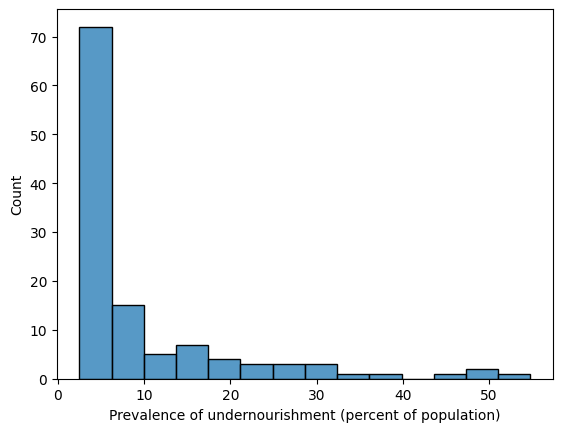

In [6]:
sns.histplot(data = test, x = "Prevalence of undernourishment (percent of population)")

<AxesSubplot: xlabel='Prevalence of HIV, total (percent of population ages 15-49)', ylabel='Count'>

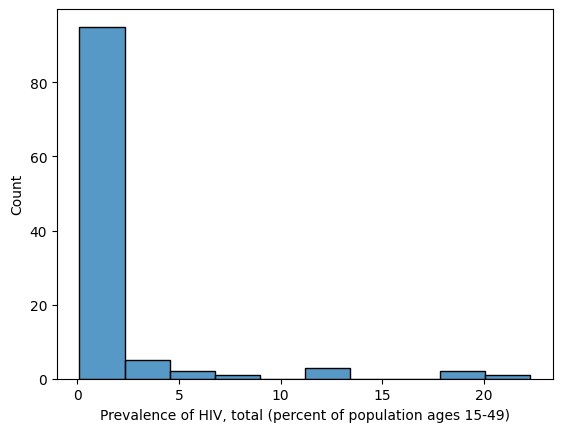

In [7]:
sns.histplot(data = test, x = "Prevalence of HIV, total (percent of population ages 15-49)", bins = 10)

<AxesSubplot: xlabel='Current health expenditure per capita, PPP (current international $)', ylabel='Count'>

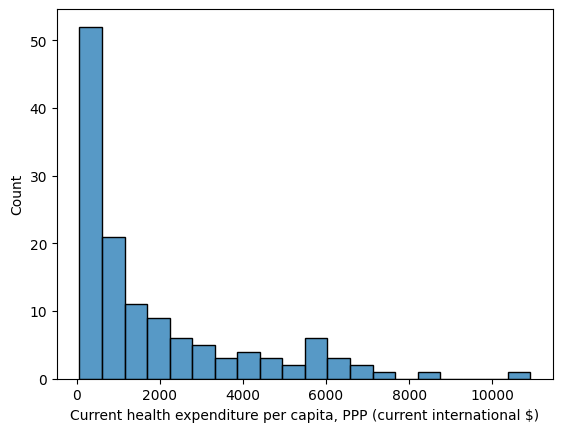

In [8]:
sns.histplot(data = test, x = "Current health expenditure per capita, PPP (current international $)", bins = 20)

<AxesSubplot: xlabel='Net migration', ylabel='Count'>

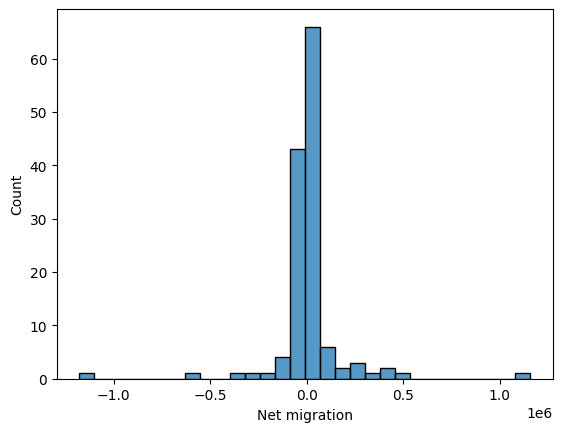

In [9]:
sns.histplot(data = test, x = "Net migration", bins = 30)

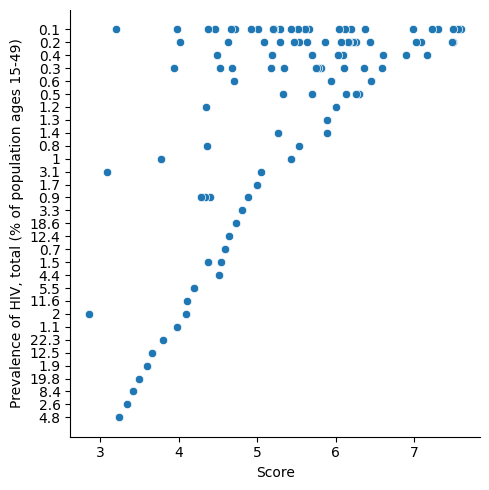

In [10]:
sns.relplot(x = "Score", y = "Prevalence of HIV, total (% of population ages 15-49)", data = test)

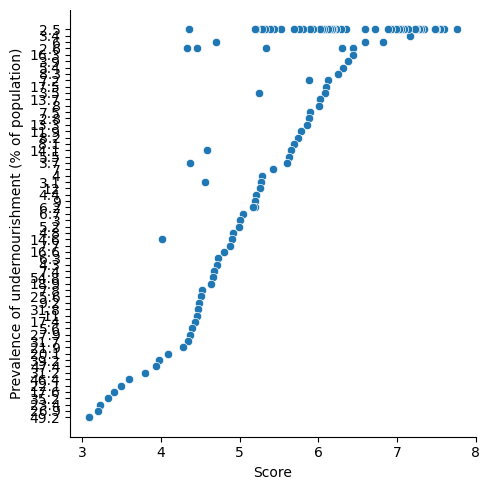

In [11]:
sns.relplot(x = "Score", y = "Prevalence of undernourishment (% of population)", data = test)

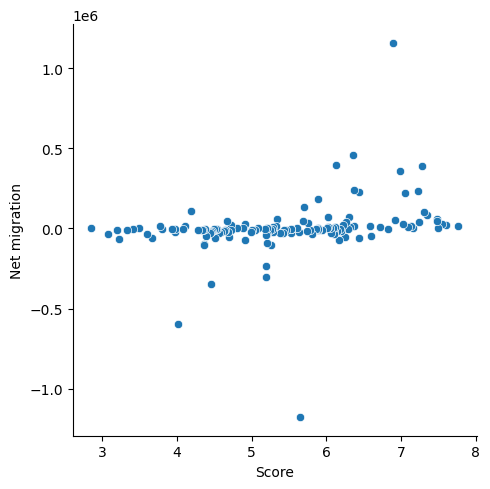

In [12]:
sns.relplot(x = "Score", y = "Net migration", data = test)  # Initially does not look like there is much of a relationship

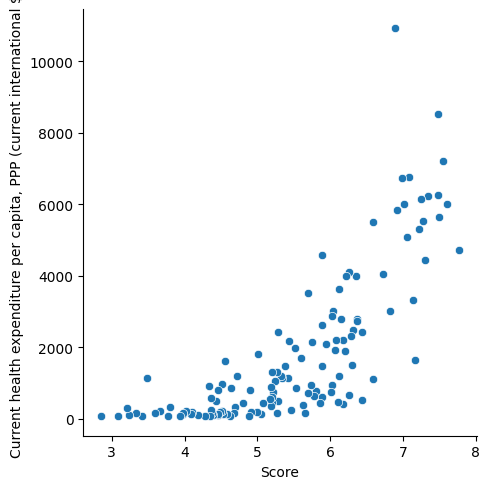

In [13]:
sns.relplot(x = "Score", y = "Current health expenditure per capita, PPP (current international $)", data = test)

In [22]:
"""
We will attempt to data mine information from the variables.

Thus, we will not be train/test splitting nor standardizing data or using 
regularization methods, for now.
"""
X = test[["Country or region",
          "Current health expenditure per capita, PPP (current international $)",
          "Prevalence of undernourishment (percent of population)",
          "Net migration",
          "Prevalence of HIV, total (percent of population ages 15-49)"]]
y = test[["Score"]]


X[X["Prevalence of HIV, total (percent of population ages 15-49)"].isna()]

,Country or region,"Current health expenditure per capita, PPP (current international $)",Prevalence of undernourishment (percent of population),Net migration,"Prevalence of HIV, total (percent of population ages 15-49)"
0,Finland,4710.218262,2.5,15558.0,NaN
6,Sweden,6222.659180,2.5,81585.0,NaN
8,Canada,5520.651367,2.5,391914.0,NaN
9,Austria,6134.131348,2.5,41105.0,NaN
12,Israel,3326.252930,2.5,16132.0,NaN
14,United Kingdom,5087.381348,2.5,221179.0,NaN
17,Belgium,5846.896484,2.5,54395.0,NaN
19,Czech Republic,NaN,NaN,NaN,NaN
20,United Arab Emirates,2996.363281,6.0,-4466.0,NaN
21,Malta,4039.614990,2.5,11247.0,NaN


One of the first big challenges we run into is missing data. Given the extremely limited amount of observations we have (155), it would be foolish to drop rows with missing entries. Instead, we can use a variation of monte carlo simulation from module 3. Specifically, we will use Markov Chain Monte Carlo (MCMC) to impute missing entries from a multivariate normal distribution. This will undoubtedly give us the most accurate values for missing data and perform better than mean replacement/row dropping.

In [44]:
lm = LinearRegression()
print(X.head())
lm.fit(X, y)
lm.coef_

   Current health expenditure per capita, PPP (current international $)  \
0                                        4710.218262                      
1                                        6015.460938                      
2                                        7217.386719                      
3                                        5636.412598                      
4                                        6248.151855                      

   Prevalence of undernourishment (percent of population)  Net migration  \
0                                                2.5             15558.0   
1                                                2.5             23305.0   
2                                                2.5             25564.0   
3                                                2.5              5152.0   
4                                                2.5             60266.0   

   Prevalence of HIV, total (percent of population ages 15-49)  
0                          

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values